In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Set Matplot Style
plt.style.use(['classic'])

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# OpenWeather API setup
base_op_weather_url = "http://api.openweathermap.org/data/2.5/weather?q="
api_url = f"&appid={weather_key}"

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
# Kelvin to Fahrenheit
def K_to_F(temp_K):
    temp_F = (9 * (temp_K - 273.15) / 5) + 32
    return temp_F

In [4]:
# Retrieve data from Open Weather API and store in dictionary
# Target Sample Size = 550 cities 
city_response = {}
output_data = {}
city_id_counter = 1
counter = 1
for city in cities:
    open_weather_url = base_op_weather_url+city
    city_response[city] = requests.get(open_weather_url + api_url).json()
    try:
        print(f"Processing City ID {city_id_counter} of {len(cities)} | {city_response[city]['name']}")
        if counter == 551:
            print("Sample N goal has been reached. Ending process...")
            break
        output_data[city] = {
            'City ID': counter,
            'City': city,
            'Cloudiness': city_response[city]['clouds']['all'],
            'Country': city_response[city]['sys']['country'],
            'Date': city_response[city]['dt'],
            'Humidity': city_response[city]['main']['humidity'],
            'Lat': city_response[city]['coord']['lat'],
            'Lng': city_response[city]['coord']['lon'],
            'Max Temp': K_to_F(city_response[city]['main']['temp_max']),
            'Wind Speed': city_response[city]['wind']['speed']
        }
        counter += 1
    except:
        if city_response[city]['cod'] == 429:
            print('API Call Limt Reached')
            break
        else:
            print(f"Processing City ID {city_id_counter} of {len(cities)} | {city.capitalize()} not found. Skipping...")
    city_id_counter += 1

Processing City ID 1 of 633 | Port-Gentil
Processing City ID 2 of 633 | Bulgan
Processing City ID 3 of 633 | Matamoros
Processing City ID 4 of 633 | Nikolskoye
Processing City ID 5 of 633 | Tuatapere
Processing City ID 6 of 633 | Rikitea
Processing City ID 7 of 633 | Mataura
Processing City ID 8 of 633 | Attawapiskat not found. Skipping...
Processing City ID 9 of 633 | Cape Town
Processing City ID 10 of 633 | Mar del Plata
Processing City ID 11 of 633 | Villa Altagracia
Processing City ID 12 of 633 | Weligama
Processing City ID 13 of 633 | Hithadhoo
Processing City ID 14 of 633 | Albany
Processing City ID 15 of 633 | Souillac
Processing City ID 16 of 633 | Vila Franca do Campo
Processing City ID 17 of 633 | Saskylakh
Processing City ID 18 of 633 | Lábrea
Processing City ID 19 of 633 | Mahébourg
Processing City ID 20 of 633 | Narsaq
Processing City ID 21 of 633 | Kavieng
Processing City ID 22 of 633 | Viedma
Processing City ID 23 of 633 | Kaeo
Processing City ID 24 of 633 | Nagato
Proce

Processing City ID 193 of 633 | Nānākuli
Processing City ID 194 of 633 | Mount Gambier
Processing City ID 195 of 633 | Pangoa
Processing City ID 196 of 633 | San Patricio
Processing City ID 197 of 633 | Villa Carlos Paz
Processing City ID 198 of 633 | Westport
Processing City ID 199 of 633 | Caldwell
Processing City ID 200 of 633 | Tessalit
Processing City ID 201 of 633 | Capelinha
Processing City ID 202 of 633 | Qandala
Processing City ID 203 of 633 | Province of Mantua
Processing City ID 204 of 633 | Vestmannaeyjar
Processing City ID 205 of 633 | Vila Velha
Processing City ID 206 of 633 | Hamilton
Processing City ID 207 of 633 | Bajram Curri
Processing City ID 208 of 633 | Okhotsk
Processing City ID 209 of 633 | Namatanai
Processing City ID 210 of 633 | Klaksvík
Processing City ID 211 of 633 | Kahului
Processing City ID 212 of 633 | Kiryat Gat
Processing City ID 213 of 633 | Zwedru
Processing City ID 214 of 633 | Wanning
Processing City ID 215 of 633 | Jardim
Processing City ID 216 o

Processing City ID 387 of 633 | Djambala
Processing City ID 388 of 633 | Tiksi
Processing City ID 389 of 633 | Urucará
Processing City ID 390 of 633 | Bubaque
Processing City ID 391 of 633 | Ayna
Processing City ID 392 of 633 | Tambilil
Processing City ID 393 of 633 | Trzebiatów
Processing City ID 394 of 633 | Chokurdakh
Processing City ID 395 of 633 | Airai
Processing City ID 396 of 633 | Ust-Kuyga
Processing City ID 397 of 633 | Karkaralinsk not found. Skipping...
Processing City ID 398 of 633 | Ponta Delgada
Processing City ID 399 of 633 | Sabha
Processing City ID 400 of 633 | Khandyga
Processing City ID 401 of 633 | Chui
Processing City ID 402 of 633 | Bonthe
Processing City ID 403 of 633 | Hihyā
Processing City ID 404 of 633 | Marcona not found. Skipping...
Processing City ID 405 of 633 | La Ronge
Processing City ID 406 of 633 | Severo-Kuril'sk
Processing City ID 407 of 633 | Griffith
Processing City ID 408 of 633 | Vaitupu not found. Skipping...
Processing City ID 409 of 633 | Ab

Processing City ID 576 of 633 | Denpasar
Processing City ID 577 of 633 | Ostrovnoy
Processing City ID 578 of 633 | Aranos
Processing City ID 579 of 633 | Kodinsk
Processing City ID 580 of 633 | Kiunga
Processing City ID 581 of 633 | Tamandaré
Processing City ID 582 of 633 | Sirte
Processing City ID 583 of 633 | Robertsport
Processing City ID 584 of 633 | Kumul
Processing City ID 585 of 633 | Nara
Processing City ID 586 of 633 | Benjamin Constant
Processing City ID 587 of 633 | Makkah al Mukarramah
Processing City ID 588 of 633 | Ishim
Processing City ID 589 of 633 | Jiayuguan City
Processing City ID 590 of 633 | Hambantota
Processing City ID 591 of 633 | Angoche
Processing City ID 592 of 633 | Laas
Processing City ID 593 of 633 | Buala
Processing City ID 594 of 633 | Saint Anthony
Processing City ID 595 of 633 | Lingyuan
Processing City ID 596 of 633 | Mayumba
Processing City ID 597 of 633 | Ina
Sample N goal has been reached. Ending process...


In [5]:
output_data_df = pd.DataFrame.from_dict(output_data).transpose()
output_data_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']] = output_data_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].astype(float)
output_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, port-gentil to mayumba
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City ID     550 non-null    object 
 1   City        550 non-null    object 
 2   Cloudiness  550 non-null    float64
 3   Country     550 non-null    object 
 4   Date        550 non-null    object 
 5   Humidity    550 non-null    float64
 6   Lat         550 non-null    float64
 7   Lng         550 non-null    float64
 8   Max Temp    550 non-null    float64
 9   Wind Speed  550 non-null    float64
dtypes: float64(6), object(4)
memory usage: 47.3+ KB


In [6]:
# Remove Cities with Humidity >100
output_data_df = output_data_df[output_data_df['Humidity'] <= 100]
output_data_df[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,20.941364,15.328909,68.939371,72.600000,47.114545,3.443309
std,32.932120,91.092592,13.960924,19.326266,38.286852,2.306999
min,-54.800000,-175.200000,33.800000,3.000000,0.000000,0.170000
25%,-5.552500,-64.590000,58.703000,63.000000,3.000000,1.507500
50%,26.565000,16.755000,71.600000,77.500000,40.000000,2.975000
75%,48.377500,99.080000,79.101500,88.000000,88.750000,4.827500
max,78.220000,178.420000,111.992000,100.000000,100.000000,12.300000


In [7]:
# Write Output Data to CSV
output_data_df.to_csv(path_or_buf = output_data_file, index = False)
output_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, port-gentil to mayumba
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City ID     550 non-null    object 
 1   City        550 non-null    object 
 2   Cloudiness  550 non-null    float64
 3   Country     550 non-null    object 
 4   Date        550 non-null    object 
 5   Humidity    550 non-null    float64
 6   Lat         550 non-null    float64
 7   Lng         550 non-null    float64
 8   Max Temp    550 non-null    float64
 9   Wind Speed  550 non-null    float64
dtypes: float64(6), object(4)
memory usage: 47.3+ KB


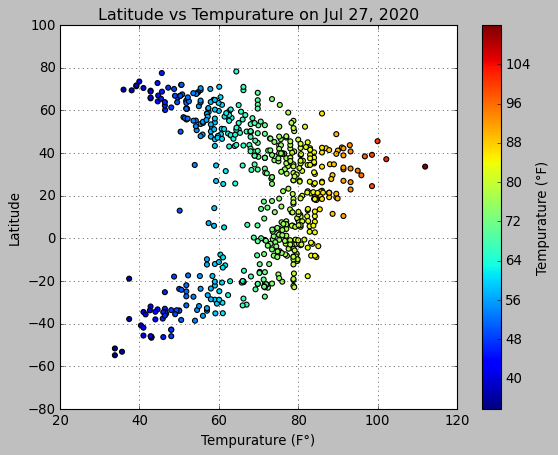

In [8]:
# Scatter Plot of Latitude vs Tempurature
color_map = plt.cm.get_cmap('RdYlBu_r')
plt.scatter(output_data_df['Max Temp'], output_data_df['Lat'], c=output_data_df['Max Temp'])
plt.xlabel('Tempurature (F°)')
plt.ylabel('Latitude')
plt.title(f"Latitude vs Tempurature on {time.ctime(output_data_df['Date'][0])[4:10]+','+time.ctime(output_data_df['Date'][0])[19:24]}")
plt.grid()
cbar = plt.colorbar()
cbar.set_label('Tempurature (°F)')

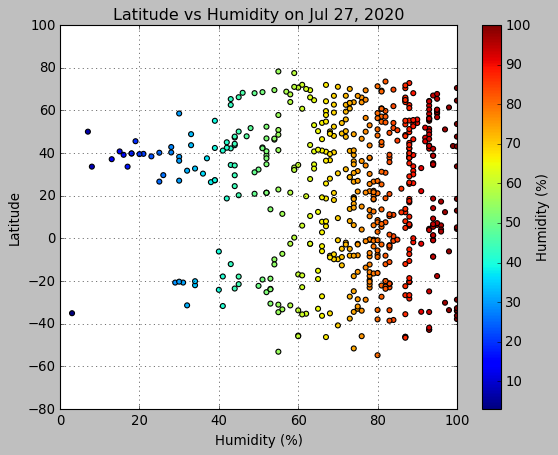

In [9]:
# Scatter Plot of Latitude vs Humidity
color_map = plt.cm.get_cmap('RdYlBu_r')
plt.scatter(output_data_df['Humidity'], output_data_df['Lat'], c=output_data_df['Humidity'])
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.xlim(left = 0, right = 100)
plt.title(f"Latitude vs Humidity on {time.ctime(output_data_df['Date'][0])[4:10]+','+time.ctime(output_data_df['Date'][0])[19:24]}")
plt.grid()
cbar = plt.colorbar()
cbar.set_label('Humidity (%)')

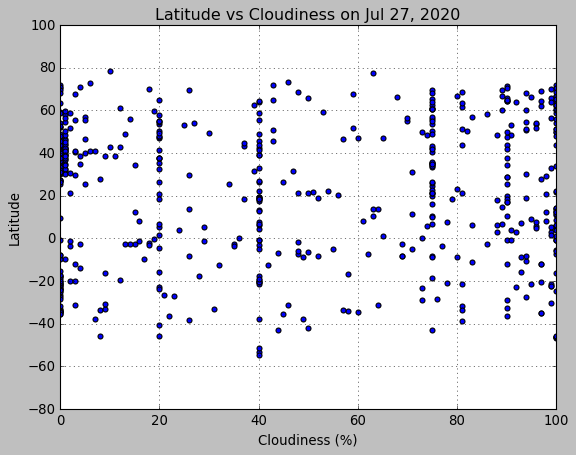

In [10]:
# Scatter Plot of Latitude vs Cloudiness
plt.scatter(output_data_df['Cloudiness'], output_data_df['Lat'])
plt.xlabel('Cloudiness (%)')
plt.xlim(left = 0, right = 100)
plt.ylabel('Latitude')
plt.title(f"Latitude vs Cloudiness on {time.ctime(output_data_df['Date'][0])[4:10]+','+time.ctime(output_data_df['Date'][0])[19:24]}")
plt.grid()

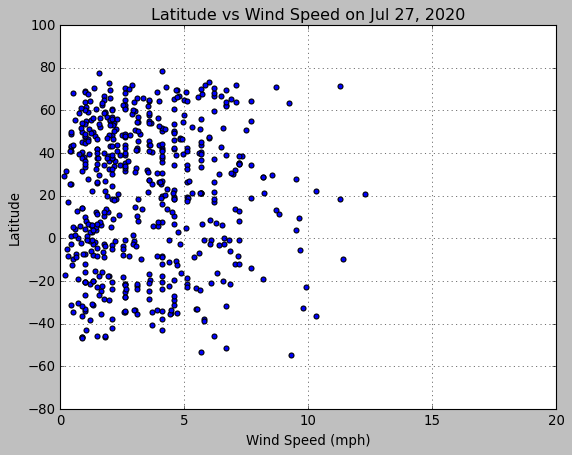

In [11]:
# Scatter Plot of Latitude vs Wind Speed
plt.scatter(output_data_df['Wind Speed'], output_data_df['Lat'])
plt.xlabel('Wind Speed (mph)')
plt.xlim(left = 0, right = 20)
plt.ylabel('Latitude')
plt.title(f"Latitude vs Wind Speed on {time.ctime(output_data_df['Date'][0])[4:10]+','+time.ctime(output_data_df['Date'][0])[19:24]}")
plt.grid()

In [12]:
# Create Dataframes for Northern and Southern Hemispheres
north_hemi_df = output_data_df[output_data_df['Lat'] >= 0]
south_hemi_df = output_data_df[output_data_df['Lat'] < 0]
north_hemi_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
bulgan,2,bulgan,13.0,MN,1595894771,74.0,48.81,103.53,60.530,0.42
matamoros,3,matamoros,90.0,MX,1595894771,88.0,25.53,-103.25,73.400,4.06
nikolskoye,4,nikolskoye,19.0,RU,1595894657,82.0,59.70,30.79,60.008,3.00
villa altagracia,10,villa altagracia,79.0,DO,1595894772,67.0,18.67,-70.17,84.992,2.24
weligama,11,weligama,100.0,LK,1595894652,88.0,5.97,80.42,78.602,3.94
...,...,...,...,...,...,...,...,...,...,...
jiayuguan,543,jiayuguan,0.0,CN,1595894581,18.0,39.82,98.30,75.668,1.75
hambantota,544,hambantota,100.0,LK,1595894763,79.0,6.12,81.12,80.096,6.53
lasa,546,lasa,5.0,IT,1595894822,93.0,46.62,10.70,60.800,1.50
saint anthony,548,saint anthony,1.0,US,1595894822,42.0,45.02,-93.22,82.400,5.70


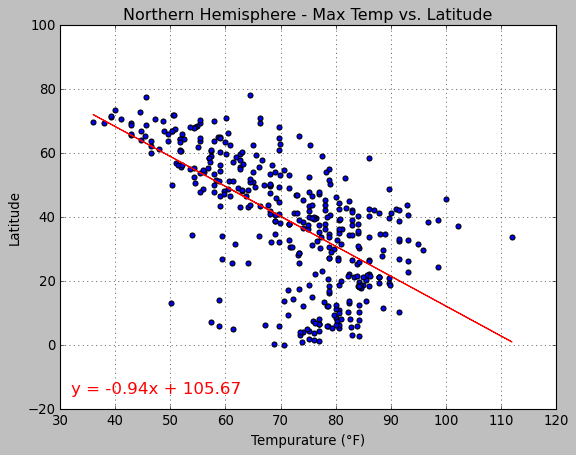

The correlation between both factors is -0.6372


In [13]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_hemi_df['Max Temp']
y_values = north_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(32,-15),fontsize=15,color="red")
plt.xlabel('Tempurature (°F)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

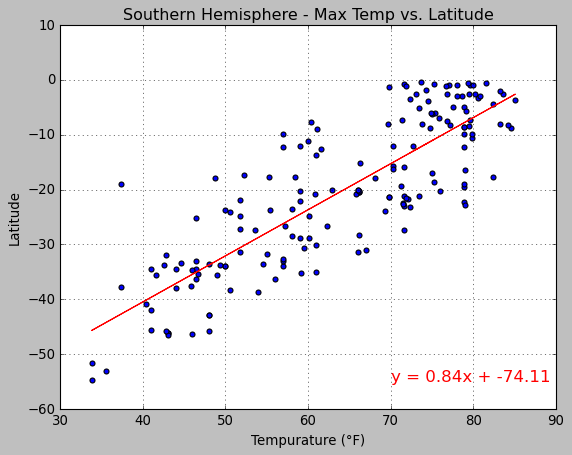

The correlation between both factors is 0.8353


In [14]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_hemi_df['Max Temp']
y_values = south_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")
plt.xlabel('Tempurature (°F)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

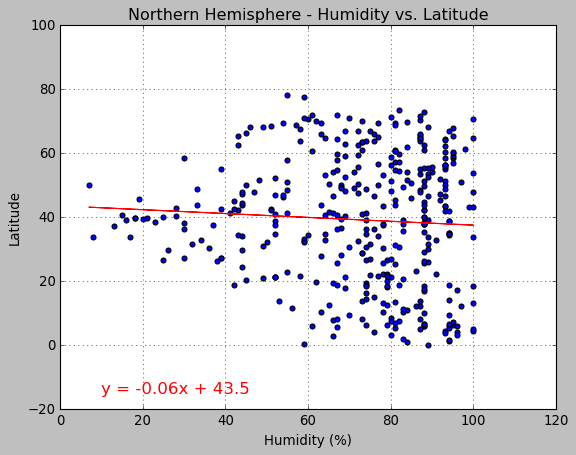

The correlation between both factors is -0.0616


In [15]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = north_hemi_df['Humidity']
y_values = north_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-15),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

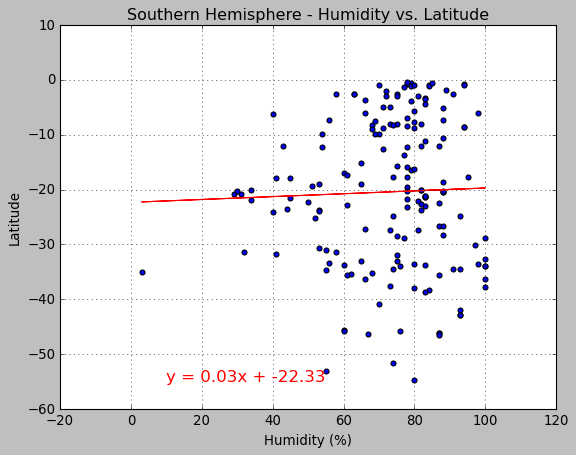

The correlation between both factors is 0.0325


In [16]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
x_values = south_hemi_df['Humidity']
y_values = south_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-55),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

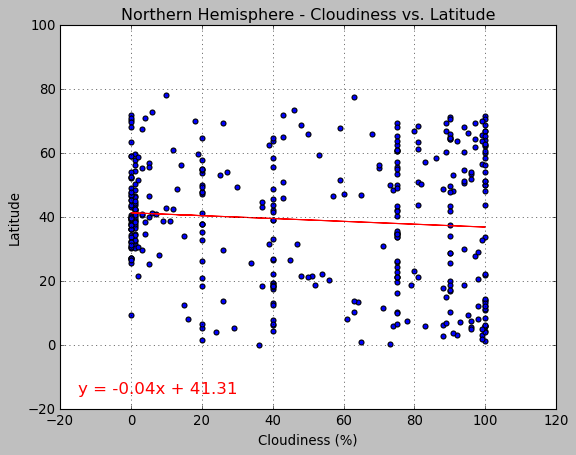

The correlation between both factors is -0.0868


In [17]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = north_hemi_df['Cloudiness']
y_values = north_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,-15),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

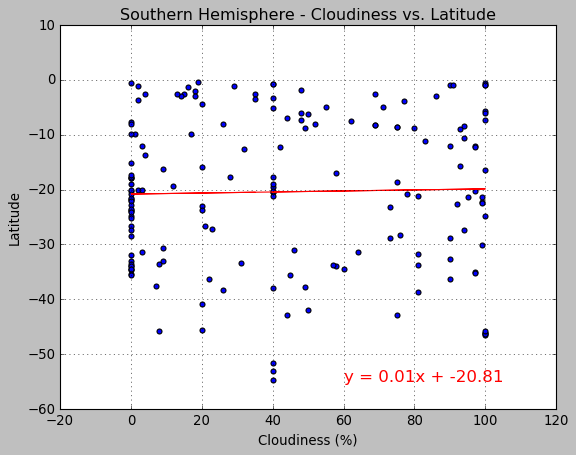

The correlation between both factors is 0.0254


In [18]:
# Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = south_hemi_df['Cloudiness']
y_values = south_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-55),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

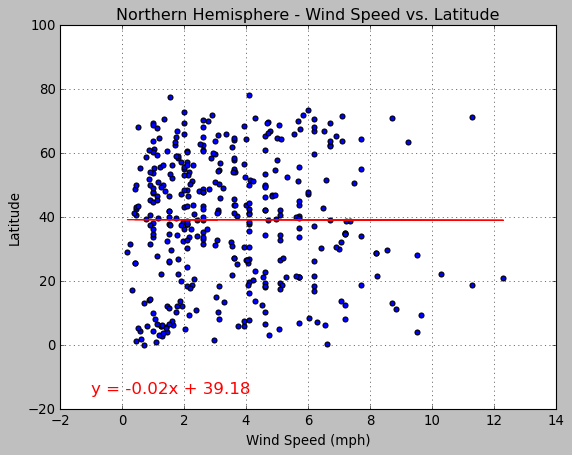

The correlation between both factors is -0.0018


In [19]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = north_hemi_df['Wind Speed']
y_values = north_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,-15),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

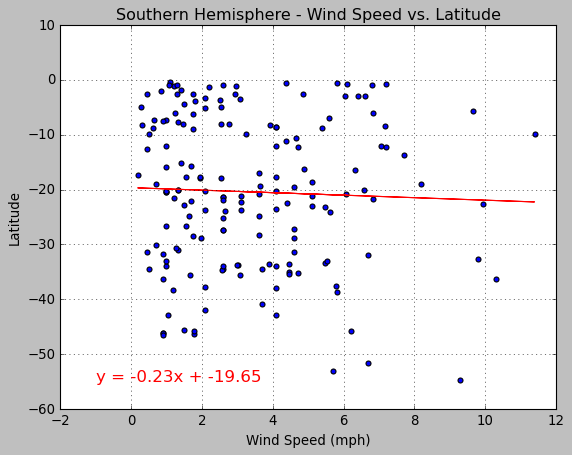

The correlation between both factors is -0.0393


In [20]:
# Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = south_hemi_df['Wind Speed']
y_values = south_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-1,-55),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")